### Packages

In [ ]:
from sklearn import neighbors
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn

%matplotlib inline

### Data

In [ ]:
# u = 'https://raw.githubusercontent.com/Zadigo/volleyball_machine_learning/master/data/olympics_2016.csv'
u = 'https://raw.githubusercontent.com/Zadigo/volleyball_machine_learning/master/data/u23_wc_2017.csv'
data = pd.read_csv(u)
data

### DataFrame

In [ ]:
features = ['height', 'weight', 'spike', 'block', 'position_number']
df = pd.DataFrame(data, columns=features)

In [ ]:
o = ['height', 'weight', 'position_number', 'spike']
training_data = df[o]

In [ ]:
df.group_by(df['country'])['height'].mean()

### Ploting the data

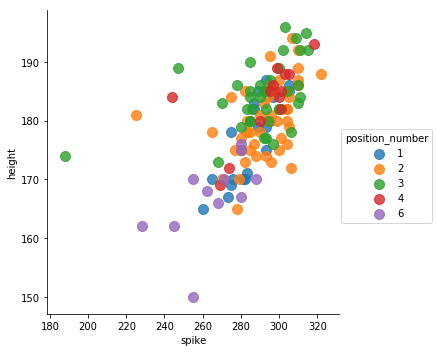

In [169]:
seaborn.lmplot('spike', 'height', data=training_data, fit_reg=False, hue="position_number", scatter_kws={"marker": "D","s": 100})

### Model

In [170]:
X = training_data.as_matrix(columns=['height', 'spike'])
y = np.array(training_data['position_number'])

In [171]:
clf = neighbors.KNeighborsClassifier(1, weights = 'uniform')

In [172]:
trained_model = clf.fit(X, y)

In [173]:
trained_model.score(X, y)

0.9465648854961832

In [200]:
x_test = np.array([[197,320]])

In [201]:
print('Predicted position: %s' % trained_model.predict(x_test)[0])

Predicted position: 4


In [202]:
print('Probability for position 1: %s' % round(trained_model.predict_proba(x_test)[0][0], 2))
print('Probability for position 2: %s' % round(trained_model.predict_proba(x_test)[0][1], 2))
print('Probability for position 3: %s' % round(trained_model.predict_proba(x_test)[0][2], 2))
print('Probability for position 4: %s' % round(trained_model.predict_proba(x_test)[0][3], 2))
print('Probability for position 6: %s' % round(trained_model.predict_proba(x_test)[0][4], 2))

Probability for position 1: 0.0
Probability for position 2: 0.0
Probability for position 3: 0.0
Probability for position 4: 1.0
Probability for position 6: 0.0


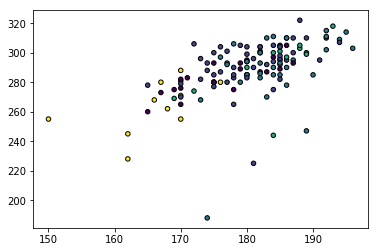

In [184]:
# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=20)
# plt.xlim(xx.min(), xx.max())
# plt.ylim(yy.min(), yy.max())
# plt.title("3-Class classification (k = %i, weights = '%s')" % (n_neighbors, weights))
plt.show()